In [1]:
import pandas as pd 

#Veriyi df'ye yükle
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

#İlk 5 satırı göster
display(df.head())

#Veri hakkında bilgi al
df.info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [2]:
#CustomerID'si boş olan sütunları sil.
df.dropna(subset = ['CustomerID'], inplace = True)

In [3]:
#Quantity sütunundaki negatif değerleri sil.(Bu viewde filtre ekliyor)
#-----df = df[df['Quantity'] > 0]

#Filtrenin daja düzgün hali.(Bu direkt datayı filtreliyor)
df = df[df['Quantity'] > 0].copy()

In [4]:
#Tarihi typecastingle.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
#Total Sales sütunu ekle.
df['TotalSales'] = df['Quantity']*df['UnitPrice']

In [ ]:
#Mevsimsel trendleri belirlemek için satış verilerini analiz etme.
import matplotlib.pyplot as plt

#Sadece yılı ve ayı tutan yeni bir sütun oluşturma.('Y', 'M', 'D')
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')

In [7]:
#Aylara göre gruplayıp toplama
monthly_sales = df.groupby('Month_Year')['TotalSales'].sum()

In [8]:
#Matplotlibde boş bir tuval aç
plt.figure(figsize = (12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

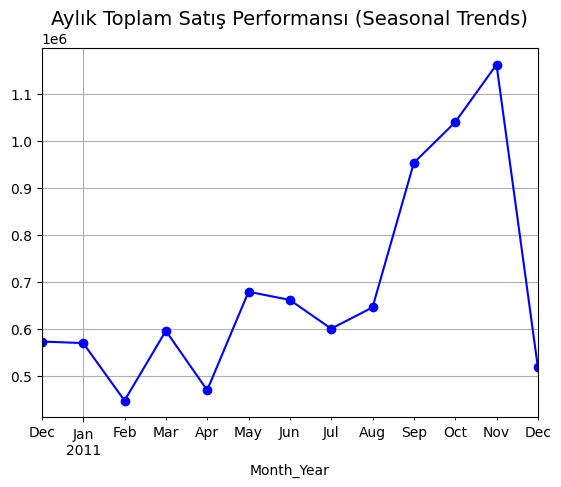

In [9]:
#Grafiği çiz
monthly_sales.plot(kind = 'line', marker = 'o', color = 'b')
plt.title('Aylık Toplam Satış Performansı (Seasonal Trends)', fontsize = 14)
plt.grid(True)
plt.show()

In [10]:
#Dosyayı kaydetme
df.to_csv('cleaned_ecommerce_data.csv', index=False)
print("Dosya başarıyla kaydedildi.")

Dosya başarıyla kaydedildi.
